# Загрузка и установка пакетов

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import re
import matplotlib.pyplot as plt
import pqr

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

import warnings
warnings.filterwarnings('ignore')

%cd C:/Users/tomtosov/Desktop

C:\Users\tomtosov\Desktop


# 1 - Загрузка ценовых данных по ETF

Открываем общий csv-файл со всей информацией

In [3]:
etf_df = pd.read_csv('etf_base.csv', index_col=0)
etf_df

,Symbol,Name,Asset Class,Assets,Avg. Daily Volume,Price,Inverse,Leveraged,Smart Beta,Currency Hedged,...,Volatility,ETF Database Pro,Dividend.1,Concentration,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),ESG Exclusion Criteria (%),Sustainable Impact Solutions (%)
0,SPY,SPDR S&P 500 ETF Trust,Equity,424609000000,70593414,467.27,false,false,false,False,...,5.23%,7.49%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IVV,iShares Core S&P 500 ETF,Equity,321394000000,4026089,469.16,false,false,false,False,...,5.24%,7.52%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VTI,Vanguard Total Stock Market ETF,Equity,288248000000,3314559,241.75,false,false,false,False,...,129.055.49%,5.48%,7.56%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VOO,Vanguard S&P 500 ETF,Equity,273279000000,4431698,429.57,false,false,false,False,...,5.35%,7.51%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QQQ,Invesco QQQ Trust,Equity,207695000000,39798453,394.70,false,false,false,False,...,6.78%,10.13%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,PSCQ,Pacer Swan SOS Conservative (October) ETF,Equity,2622100,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2541,PSFO,Pacer Swan SOS Flex (October) ETF,Equity,5356000,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2542,PSMO,Pacer Swan SOS Moderate (October) ETF,Equity,12119200,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2543,BLKC,Invesco Alerian Galaxy Blockchain Users and De...,Equity,6078800,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Создаем отдельную таблицу с фондами, которые инвестируют только в акции

In [4]:
equity_etf = etf_df[etf_df['Asset Class'] == 'Equity']
equity_etf

,Symbol,Name,Asset Class,Assets,Avg. Daily Volume,Price,Inverse,Leveraged,Smart Beta,Currency Hedged,...,Volatility,ETF Database Pro,Dividend.1,Concentration,ESG Score,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),ESG Exclusion Criteria (%),Sustainable Impact Solutions (%)
0,SPY,SPDR S&P 500 ETF Trust,Equity,424609000000,70593414,467.27,false,false,false,False,...,5.23%,7.49%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IVV,iShares Core S&P 500 ETF,Equity,321394000000,4026089,469.16,false,false,false,False,...,5.24%,7.52%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VTI,Vanguard Total Stock Market ETF,Equity,288248000000,3314559,241.75,false,false,false,False,...,129.055.49%,5.48%,7.56%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VOO,Vanguard S&P 500 ETF,Equity,273279000000,4431698,429.57,false,false,false,False,...,5.35%,7.51%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QQQ,Invesco QQQ Trust,Equity,207695000000,39798453,394.70,false,false,false,False,...,6.78%,10.13%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,PSCQ,Pacer Swan SOS Conservative (October) ETF,Equity,2622100,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2541,PSFO,Pacer Swan SOS Flex (October) ETF,Equity,5356000,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2542,PSMO,Pacer Swan SOS Moderate (October) ETF,Equity,12119200,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2543,BLKC,Invesco Alerian Galaxy Blockchain Users and De...,Equity,6078800,NaN,NaN,false,false,false,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сохраним тикеры в список, который мы будем использовать для запроса в Yahoo Finance

In [5]:
etf_list = equity_etf['Symbol'].to_list()

Выгружаем цены по списку ETF за максимально доступный период с шагом в 1 торговый день:

In [6]:
etf_data = yf.download(tickers = etf_list, period = 'max', interval = '1d', group_by = 'ticker')

[*********************100%***********************]  1804 of 1804 completed

2 Failed downloads:
- MJJ: No data found, symbol may be delisted
- MJO: No data found, symbol may be delisted


In [7]:
etf_data

XDAP                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2021-04-01  25.540001  25.620001  25.426001  25.618999  25.618999  147500.0   
2021-04-05  25.799999  25.930000  25.790001  25.888000  25.888000   17500.0   
2021-04-06  25.850000  25.920000  25.840000  25.840000  25.840000   14700.0   
2021-04-07  25.920000  25.920000  25.840000  25.840000  25.840000   11900.0   
2021-04-08  26.020000  26.020000  25.889999  25.951000  25.951000   20000.0   
...               ...        ...        ...        ...        ...       ...   
1995-04-27        NaN        NaN        NaN        NaN        NaN       NaN   
1995-04-28        NaN        NaN        NaN        NaN        NaN       NaN   
1995-05-01        NaN        NaN        NaN        NaN        NaN       NaN   
1995-05-02        NaN        NaN        NaN        NaN        NaN       NaN   
1995-05-03        NaN        NaN        NaN        NaN        NaN       NaN   

                 FNOV                                   ...       BFOR  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2021-04-01  36.639999  36.740002  36.580002  36.696999  ...  56.770000   
2021-04-05  36.750000  36.886002  36.750000  36.880001  ...  57.259998   
2021-04-06  36.900002  37.018002  36.848000  36.904999  ...  57.709999   
2021-04-07  36.896000  36.948002  36.896000  36.932999  ...  57.259998   
2021-04-08  36.889999  37.000000  36.889999  36.952000  ...  57.230000   
...               ...        ...        ...        ...  ...        ...   
1995-04-27        NaN        NaN        NaN        NaN  ...        NaN   
1995-04-28        NaN        NaN        NaN        NaN  ...        NaN   
1995-05-01        NaN        NaN        NaN        NaN  ...        NaN   
1995-05-02        NaN        NaN        NaN        NaN  ...        NaN   
1995-05-03        NaN        NaN        NaN        NaN  ...        NaN   

                                                SCJ                        \
                Close  Adj Close  Volume       Open       High        Low   
Date                                                                        
2021-04-01  57.110001  57.110001  1800.0  81.519997  81.870003  81.519997   
2021-04-05  57.830002  57.830002  5100.0  82.250000  82.660004  82.250000   
2021-04-06  57.730000  57.730000  3800.0  81.800003  81.930000  81.690002   
2021-04-07  57.259998  57.259998  4000.0  82.449997  82.730003  82.449997   
2021-04-08  57.680000  57.680000  6800.0  82.360001  82.360001  82.160004   
...               ...        ...     ...        ...        ...        ...   
1995-04-27        NaN        NaN     NaN        NaN        NaN        NaN   
1995-04-28        NaN        NaN     NaN        NaN        NaN        NaN   
1995-05-01        NaN        NaN     NaN        NaN        NaN        NaN   
1995-05-02        NaN        NaN     NaN        NaN        NaN        NaN   
1995-05-03        NaN        NaN     NaN        NaN        NaN        NaN   

                                          
                Close  Adj Close  Volume  
Date                                      
2021-04-01  81.870003  81.273964  5200.0  
2021-04-05  82.660004  82.058212  8200.0  
2021-04-06  81.690002  81.095276  5300.0  
2021-04-07  82.660004  82.058212  6600.0  
2021-04-08  82.279999  81.680977  1200.0  
...               ...        ...     ...  
1995-04-27        NaN        NaN     NaN  
1995-04-28        NaN        NaN     NaN  
1995-05-01        NaN        NaN     NaN  
1995-05-02        NaN        NaN     NaN  
1995-05-03        NaN        NaN     NaN  

[7564 rows x 10824 columns]

# 2 - Обработка данных

Приведем данные к месячному виду. Значением месяца будет значение последнего дня в этом месяце

In [9]:
etf_data.index = pd.to_datetime(etf_data.index)

etf_data_montly = etf_data.resample('M').last()
etf_data_montly

XDAP                                                      \
                 Open       High        Low      Close  Adj Close  Volume   
Date                                                                        
1993-01-31        NaN        NaN        NaN        NaN        NaN     NaN   
1993-02-28        NaN        NaN        NaN        NaN        NaN     NaN   
1993-03-31        NaN        NaN        NaN        NaN        NaN     NaN   
1993-04-30        NaN        NaN        NaN        NaN        NaN     NaN   
1993-05-31        NaN        NaN        NaN        NaN        NaN     NaN   
...               ...        ...        ...        ...        ...     ...   
2022-10-31  25.049999  25.049999  25.014000  25.014000  25.014000   100.0   
2022-11-30  26.040001  26.382999  26.040001  26.382999  26.382999   600.0   
2022-12-31  24.615000  24.712000  24.520000  24.712000  24.712000  2100.0   
2023-01-31  26.112000  26.243999  26.112000  26.243999  26.243999   900.0   
2023-02-28  26.370001  26.370001  26.370001  26.370001  26.370001     0.0   

                 FNOV                                   ...       BFOR  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
1993-01-31        NaN        NaN        NaN        NaN  ...        NaN   
1993-02-28        NaN        NaN        NaN        NaN  ...        NaN   
1993-03-31        NaN        NaN        NaN        NaN  ...        NaN   
1993-04-30        NaN        NaN        NaN        NaN  ...        NaN   
1993-05-31        NaN        NaN        NaN        NaN  ...        NaN   
...               ...        ...        ...        ...  ...        ...   
2022-10-31  35.230000  35.369999  35.220001  35.263000  ...  54.610001   
2022-11-30  36.139999  36.900002  36.000000  36.900002  ...  56.209999   
2022-12-31  35.299999  35.520000  35.200001  35.520000  ...  53.099998   
2023-01-31  36.889999  37.310001  36.889999  37.310001  ...  57.349998   
2023-02-28  37.169998  37.419998  37.169998  37.419998  ...  57.980000   

                                                SCJ                        \
                Close  Adj Close  Volume       Open       High        Low   
Date                                                                        
1993-01-31        NaN        NaN     NaN        NaN        NaN        NaN   
1993-02-28        NaN        NaN     NaN        NaN        NaN        NaN   
1993-03-31        NaN        NaN     NaN        NaN        NaN        NaN   
1993-04-30        NaN        NaN     NaN        NaN        NaN        NaN   
1993-05-31        NaN        NaN     NaN        NaN        NaN        NaN   
...               ...        ...     ...        ...        ...        ...   
2022-10-31  54.700001  54.700001  2400.0  58.049999  58.150002  58.020000   
2022-11-30  57.950001  57.950001  9900.0  64.000000  64.599998  64.000000   
2022-12-31  53.299999  53.299999  2900.0  64.800003  65.029999  64.680000   
2023-01-31  57.799999  57.799999  1900.0  67.949997  68.139999  67.949997   
2023-02-28  57.980000  57.980000   300.0  66.739998  66.790001  66.739998   

                                          
                Close  Adj Close  Volume  
Date                                      
1993-01-31        NaN        NaN     NaN  
1993-02-28        NaN        NaN     NaN  
1993-03-31        NaN        NaN     NaN  
1993-04-30        NaN        NaN     NaN  
1993-05-31        NaN        NaN     NaN  
...               ...        ...     ...  
2022-10-31  58.130001  58.130001  8500.0  
2022-11-30  64.449997  64.449997  3300.0  
2022-12-31  64.930000  64.930000  4700.0  
2023-01-31  68.139999  68.139999  4000.0  
2023-02-28  66.790001  66.790001   500.0  

[362 rows x 10824 columns]

Оставим данные только по Adjusted Close для каждого фонда:

In [10]:
etf_montly_adj_price = etf_data_montly.xs('Adj Close', level = 1, axis = 1)
etf_montly_adj_price

,XDAP,FNOV,PSCQ,IPO,SPAK,DWMF,PAK,IEDI,XJH,ISDX,...,EMTY,DOG,AFTY,CBTG,NSCS,FXR,KSA,SFYX,BFOR,SCJ
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,25.014000,35.263000,19.952000,27.990000,NaN,22.603863,16.395000,36.463779,32.684368,24.624454,...,14.914,33.790001,13.160000,NaN,21.572001,50.680000,42.840000,11.290,54.700001,58.130001
2022-11-30,26.382999,36.900002,20.504999,27.629999,NaN,24.230469,16.780001,38.677505,34.747730,27.545492,...,13.980,31.969999,15.580000,NaN,22.475000,54.049999,39.430000,11.903,57.950001,64.449997
2022-12-31,24.712000,35.520000,20.139999,24.719999,NaN,23.780001,15.000000,35.970001,32.803001,26.860001,...,14.809,33.330002,15.854000,NaN,20.938999,51.509998,37.720001,11.030,53.299999,64.930000


Да, технически Yahoo выдает данные с 1993г, но тогда торговалось слишком мало фондов. Разумнее начать тестировать стратегии с 2010г:

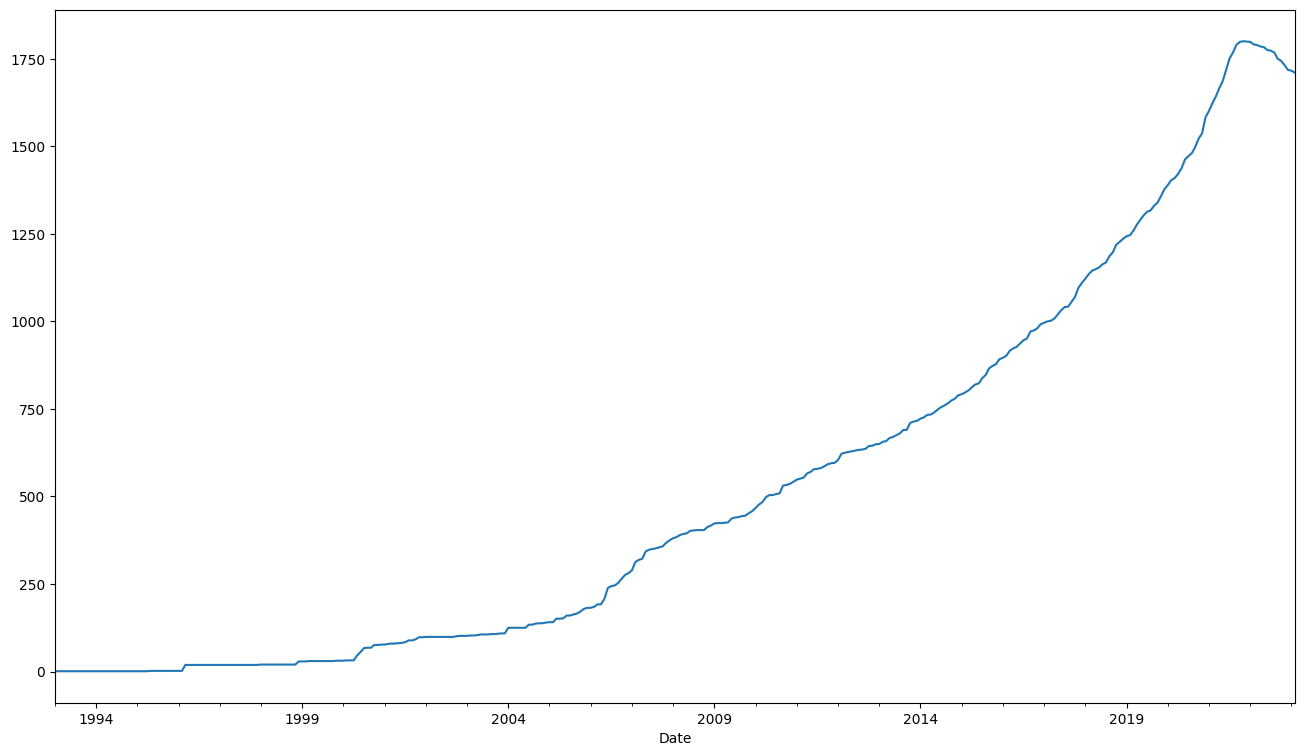

In [11]:
etf_montly_adj_price.count(axis=1).plot()
plt.show()

Создадим второй файл со стартовой датой январь 2010г:

In [12]:
etf_prices = etf_montly_adj_price['2010':]
etf_prices = etf_prices.replace(0, np.nan)
etf_prices

,XDAP,FNOV,PSCQ,IPO,SPAK,DWMF,PAK,IEDI,XJH,ISDX,...,EMTY,DOG,AFTY,CBTG,NSCS,FXR,KSA,SFYX,BFOR,SCJ
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,210.983536,NaN,NaN,NaN,12.879030,NaN,NaN,NaN,31.556074
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,204.386627,NaN,NaN,NaN,13.655746,NaN,NaN,NaN,32.201817
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,193.691071,NaN,NaN,NaN,14.667283,NaN,NaN,NaN,33.656700
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,190.490250,NaN,NaN,NaN,15.254337,NaN,NaN,NaN,34.318016
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,204.659866,NaN,NaN,NaN,13.935726,NaN,NaN,NaN,31.836153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,25.014000,35.263000,19.952000,27.990000,NaN,22.603863,16.395000,36.463779,32.684368,24.624454,...,14.914,33.790001,13.160000,NaN,21.572001,50.680000,42.840000,11.290,54.700001,58.130001
2022-11-30,26.382999,36.900002,20.504999,27.629999,NaN,24.230469,16.780001,38.677505,34.747730,27.545492,...,13.980,31.969999,15.580000,NaN,22.475000,54.049999,39.430000,11.903,57.950001,64.449997
2022-12-31,24.712000,35.520000,20.139999,24.719999,NaN,23.780001,15.000000,35.970001,32.803001,26.860001,...,14.809,33.330002,15.854000,NaN,20.938999,51.509998,37.720001,11.030,53.299999,64.930000


# 3 - Построение стратегии Cross-Sectional Momentum

Данные готовы и можно приступать к построению первой стратегии. Сперва **ответим для себя на следующие вопросы:**

1) По логике моментума, мы должны отбирать ETF с наибольшим ростом цены за предыдущий период. Какой период для принятия решений взять? 1/2/3/12 месяцев?

2) После покупки мы удерживаем позиции минимум 1 период. Но может делать такие частые ребалансировки излишне?

3) В академических исследованиях иногда говорится о целесообразности выставления лага между периодом наблюдения и покупкой. Если он нужен, то какой период достаточен?

4) Логика портфельного тестирования предполагает разделение доступной выборки на определенное количество портфелей по квантилям. Какой квантиль применить в нашем случае?

5) По какому показателю принимать решение об эффективности стратегии?

**Универсальный ответ на все пять вопросов - нужно перебирать как можно большее число параметров для поиска устойчивости.** Для 1-3 пунктов мы используем параметры перебора периодов. Для 4-5 пунктов, потребуется запуск нескольких бэктестов с таргетированием разных метрик и параметрами квантилей.

Зададим параметры перебора и выберем среднюю доходность стратегии как целевую метрику:

In [18]:
universe = etf_prices > 0

returns_calculator = pqr.utils.partial(
    pqr.calculate_returns, 
    universe_returns=pqr.prices_to_returns(etf_prices),
)

ew_benchmark = pqr.Benchmark.from_universe(
    universe=universe,
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
)

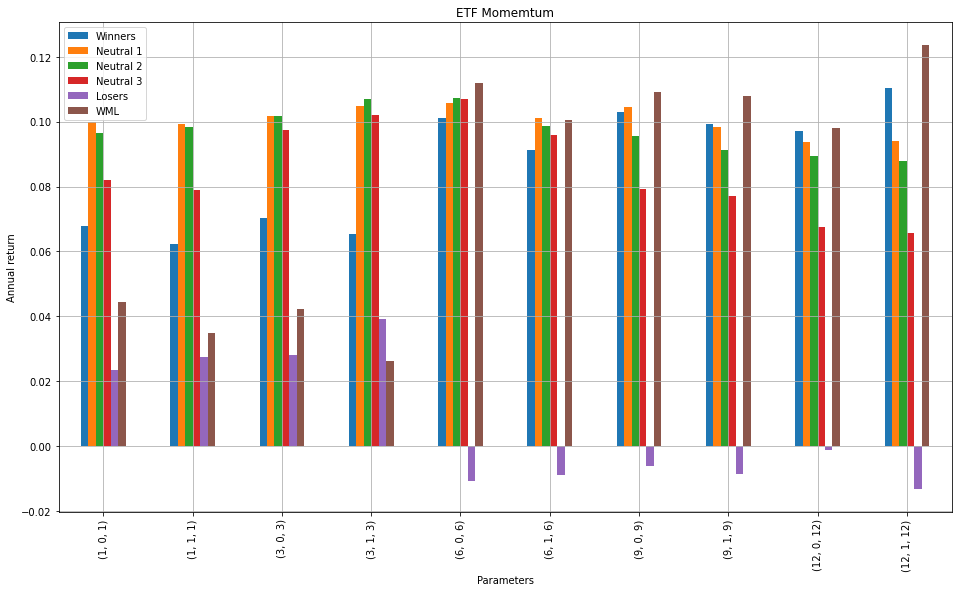

In [27]:
def mean_transform_factory(looking, lag, holding):
    return pqr.utils.compose(
        pqr.utils.partial(pqr.factors.filter, universe=universe),
        pqr.utils.partial(pqr.factors.look_back_pct_change, period=looking),
        pqr.utils.partial(pqr.factors.lag, period=lag),
        pqr.utils.partial(pqr.factors.hold, period=holding),
    )


transforms_grid_value = {
    "(1, 0, 1)": mean_transform_factory(1, 1, 1),
    "(1, 1, 1)": mean_transform_factory(1, 2, 1),
    "(3, 0, 3)": mean_transform_factory(3, 1, 3),
    "(3, 1, 3)": mean_transform_factory(3, 2, 3),
    "(6, 0, 6)": mean_transform_factory(6, 1, 6),
    "(6, 1, 6)": mean_transform_factory(6, 2, 6),
    "(9, 0, 9)": mean_transform_factory(9, 1, 9),
    "(9, 1, 9)": mean_transform_factory(9, 2, 9),
    "(12, 0, 12)": mean_transform_factory(12, 1, 12),
    "(12, 1, 12)": mean_transform_factory(12, 2, 12),
}


pqr.factors.grid_search_factor_portfolios(
    factor=etf_prices,
    strategies=pqr.factors.split_quantiles(5, better='more'),
    transforms=transforms_grid_value,
    metric=pqr.utils.partial(
        pqr.metrics.mean_return,
        annualizer=12,
    ),
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    add_wml=True,
).plot.bar()

plt.title("ETF Momemtum")
plt.xlabel("Parameters")
plt.ylabel("Annual return")
plt.grid()

# 4 - ETF на классы активов

Базовая статья для стратегии - Antonacci (2012) https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2042750

Бенчмарки - используем их в качестве эталонных индексов для сравнения классов активов

iShares MSCI World ETF, SPDR Barclays International Treasury Bond, iShares S&P GSCI Commodity-Indexed Trust

Инструменты для покупки внутри класса активов

Для акций это страновые ETF: US CANADA UK GERMANY AUSTRALIA JAPAN CHINA FRANCE BRAZIL RUSSIA

Для бондов с разделением на регионы, сегмент и дюрацию

Для сырья - это ETF на отдельный биржевой товар: GOLD SILVER OIL PLATINUM GAS FOOD CORN WHEAT GASOLINE SOY

In [29]:
assets_etf_list = ['URTH', 'BWX', 'GSG'] 

stocks_etf_list = ['SPY', 'EWC', 'EWU', 'EWG', 'EWA','EWJ','MCHI', 'EWQ', 'EWZ','ERUS'] 

bonds_etf_list = ['EMB','EMHY','BWZ','IGOV','CEMB','TIP','TLT','SHY','VCSH','LQD']

commodities_etf_list = ['GLD','SLV','USO','PPLT', 'UNG', 'DBA', 'CORN','WEAT','UGA','SOYB']

In [32]:
assets_etf = yf.download(tickers = assets_etf_list, period = '10y', interval = '1d', group_by = 'ticker')
stocks_etf  = yf.download(tickers = stocks_etf_list, period = '10y', interval = '1d', group_by = 'ticker')
bonds_etf = yf.download(tickers = bonds_etf_list, period = '10y', interval = '1d', group_by = 'ticker')
commodities_etf = yf.download(tickers = commodities_etf_list, period = '10y', interval = '1d', group_by = 'ticker')

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed


In [33]:
assets_etf = assets_etf.resample('M').last()
assets_etf = assets_etf.xs('Adj Close', level = 1, axis = 1)
assets_etf = assets_etf.replace(0, np.nan)

stocks_etf = stocks_etf.resample('M').last()
stocks_etf = stocks_etf.xs('Adj Close', level = 1, axis = 1)

bonds_etf = bonds_etf.resample('M').last()
bonds_etf = bonds_etf.xs('Adj Close', level = 1, axis = 1)

commodities_etf = commodities_etf.resample('M').last()
commodities_etf = commodities_etf.xs('Adj Close', level = 1, axis = 1)

In [39]:
assets_etf

,BWX,GSG,URTH
Date,,,
2013-02-28,26.773449,32.540001,48.811771
2013-03-31,26.680399,32.900002,49.843830
2013-04-30,27.397297,31.290001,51.189621
2013-05-31,26.207775,30.809999,52.518890
2013-06-30,25.756092,30.799999,50.240498
...,...,...,...
2022-10-31,20.747431,21.850000,106.635681
2022-11-30,22.435041,21.590000,114.597130
2022-12-31,22.400068,21.230000,109.250000


**Запускаем четыре отдельных CS-моментума по каждому классу активов**

Параметры

In [40]:
assets_universe = assets_etf > 0
stocks_universe = stocks_etf > 0
bonds_universe = bonds_etf > 0
commodities_universe = commodities_etf > 0

In [41]:
assets_returns_calculator = pqr.utils.partial(
    pqr.calculate_returns, 
    universe_returns=pqr.prices_to_returns(assets_etf),
)

stocks_returns_calculator = pqr.utils.partial(
    pqr.calculate_returns, 
    universe_returns=pqr.prices_to_returns(stocks_etf),
)

bonds_returns_calculator = pqr.utils.partial(
    pqr.calculate_returns, 
    universe_returns=pqr.prices_to_returns(bonds_etf),
)

commodities_returns_calculator = pqr.utils.partial(
    pqr.calculate_returns, 
    universe_returns=pqr.prices_to_returns(commodities_etf),
)

In [42]:
assets_ew_benchmark = pqr.Benchmark.from_universe(
    universe=assets_universe,
    allocator=pqr.equal_weights,
    calculator=assets_returns_calculator,
)

In [44]:
assets_dynamic_params = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=assets_universe),
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=6),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=6),
)

stocks_dynamic_params = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=stocks_universe),
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=6),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=6),
)

bonds_dynamic_params = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=bonds_universe),
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=6),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=6),
)

commodities_dynamic_params = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=commodities_universe),
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=6),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=6),
)

In [45]:
assets_factor = assets_dynamic_params(assets_etf)
stocks_factor = stocks_dynamic_params(stocks_etf)
bonds_factor = bonds_dynamic_params(bonds_etf)
commodities_factor = commodities_dynamic_params(commodities_etf)

Метрики

In [46]:
table = pqr.metrics.Table()

table.add_metric(
    pqr.utils.partial(
        pqr.metrics.mean_return, 
        statistics=True,
        annualizer=12,
    ),
    multiplier=100, 
    name="Monthly Mean Return, %",
)

table.add_metric(
    pqr.utils.partial(
        pqr.metrics.volatility,
        annualizer=12,
    ),
    multiplier=100,
    name="Monthly Volatility, %",
)

table.add_metric(
    pqr.utils.partial(
        pqr.metrics.alpha,
        benchmark=assets_ew_benchmark, # всегда к классами активов
        statistics=True,
        annualizer=12,
    ),
    multiplier=100,
    name="Alpha, %",
)

table.add_metric(
    pqr.utils.partial(
        pqr.metrics.sharpe_ratio,
    ),
    name="Sharpe Ratio, %",
)

table.add_metric(
    pqr.utils.partial(
        pqr.metrics.mean_turnover,
        annualizer=12,
    ),
    multiplier=100,
    name="Mean Turnover, %",
)

table.add_metric(
    pqr.utils.partial(
        pqr.metrics.win_rate,
    ),
    multiplier=100,
    name="Win Rate, %",
)

table.add_metric(
    pqr.utils.partial(
        pqr.metrics.max_drawdown,
    ),
    multiplier=100,
    name="Max Drawdown, %",
)

fig = pqr.metrics.Figure( 
    pqr.metrics.compounded_returns, 
    name="Compounded Returns", 
    benchmark=assets_ew_benchmark,
    log_scale=False, 
)

summary = pqr.metrics.Dashboard([table, fig])

Моментум среди классов активов

,Winners,Neutral 1,Losers,Assets_momentum
"Monthly Mean Return, %",9.46** (2.25),5.51 (1.17),-9.33 (-1.44),18.78*** (2.80)
"Monthly Volatility, %",12.95,14.55,19.90,20.69
"Alpha, %",8.03** (2.47),3.62 (1.16),-12.16*** (-3.30),20.19*** (3.25)
"Sharpe Ratio, %",0.73,0.38,-0.47,0.91
"Mean Turnover, %",221.05,178.95,136.84,357.89
"Win Rate, %",60.53,60.53,48.25,59.65
"Max Drawdown, %",-22.58,-21.34,-75.80,-23.81


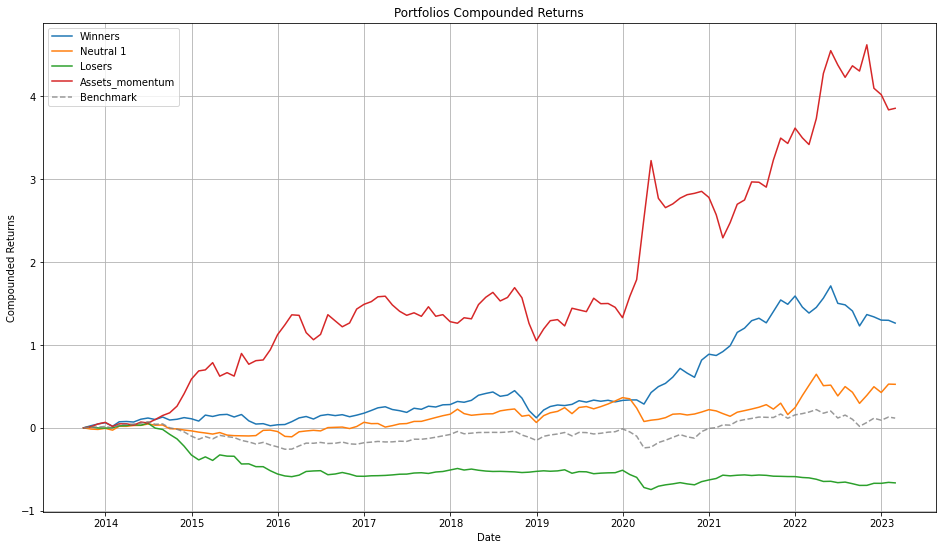

In [66]:
assets_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=assets_factor, 
    strategies=pqr.factors.split_quantiles(3, better='more'),
    allocator=pqr.equal_weights, 
    calculator=assets_returns_calculator, 
    add_wml=True, 
)

assets_momentum_portfolios[-1].name = 'Assets_momentum'

summary.display(assets_momentum_portfolios)

Моментум среди ETF на акции

,Winners,Neutral 1,Losers,Stocks_momentum
"Monthly Mean Return, %",0.01 (0.00),6.79* (1.34),6.94 (1.12),-6.93 (-1.64)
"Monthly Volatility, %",16.98,15.58,19.07,13.03
"Alpha, %",-2.29 (-0.66),4.50* (1.67),4.27 (1.17),-6.56 (-1.56)
"Sharpe Ratio, %",0.00,0.44,0.36,-0.53
"Mean Turnover, %",242.11,194.74,231.58,473.68
"Win Rate, %",53.51,57.89,50.88,41.23
"Max Drawdown, %",-39.93,-24.68,-32.46,-59.03


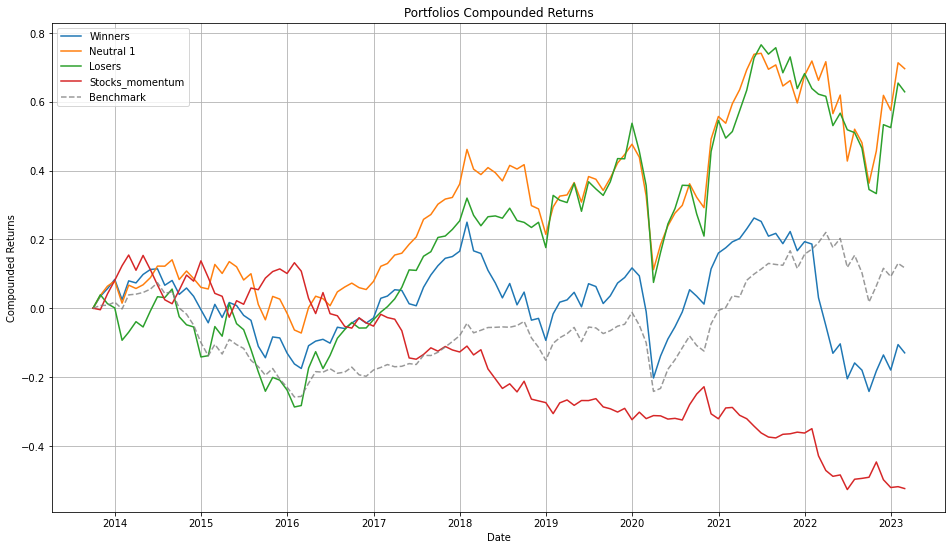

In [67]:
stocks_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=stocks_factor, 
    strategies=pqr.factors.split_quantiles(3, better='more'),
    allocator=pqr.equal_weights, 
    calculator=stocks_returns_calculator, 
    add_wml=True, 
)

stocks_momentum_portfolios[-1].name = 'Stocks_momentum'

summary.display(stocks_momentum_portfolios)

Моментум среди ETF на облигации

,Winners,Neutral 1,Losers,Bonds_momentum
"Monthly Mean Return, %",2.13 (1.20),0.58 (0.26),0.98 (0.46),1.15 (0.69)
"Monthly Volatility, %",5.49,6.80,6.60,5.15
"Alpha, %",1.76 (1.07),-0.06 (-0.03),0.31 (0.18),1.45 (0.92)
"Sharpe Ratio, %",0.39,0.09,0.15,0.22
"Mean Turnover, %",247.37,252.63,252.63,500.00
"Win Rate, %",52.63,53.51,48.25,55.26
"Max Drawdown, %",-19.12,-25.10,-23.58,-10.92


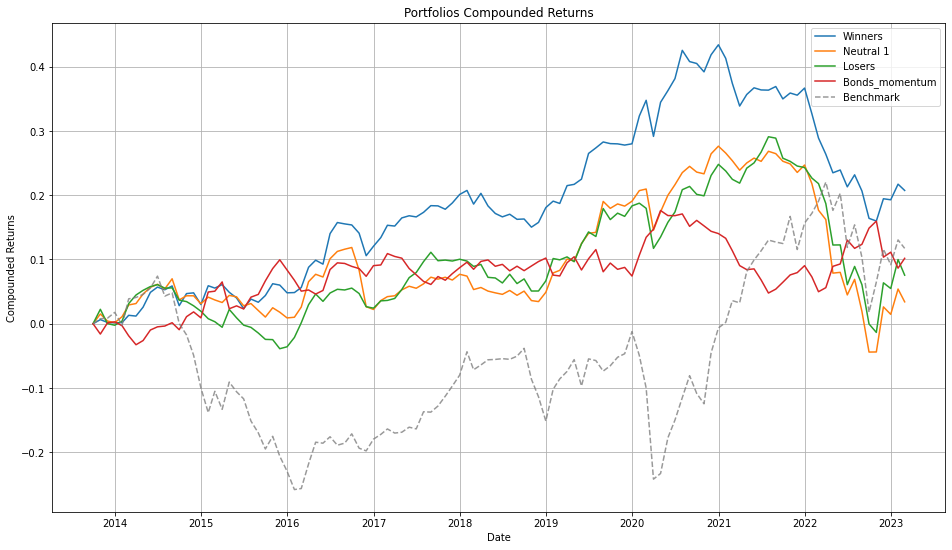

In [68]:
bonds_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=bonds_factor, 
    strategies=pqr.factors.split_quantiles(3, better='more'),
    allocator=pqr.equal_weights, 
    calculator=bonds_returns_calculator, 
    add_wml=True, 
)

bonds_momentum_portfolios[-1].name = 'Bonds_momentum'

summary.display(bonds_momentum_portfolios)

Моментум среди ETF на сырьевые товары

,Winners,Neutral 1,Losers,Commodities_momentum
"Monthly Mean Return, %",-3.33 (-0.55),-3.00 (-0.58),3.26 (0.55),-6.60 (-0.94)
"Monthly Volatility, %",18.64,16.00,18.38,21.67
"Alpha, %",-5.19 (-1.05),-4.70 (-1.14),1.25 (0.27),-6.44 (-0.91)
"Sharpe Ratio, %",-0.18,-0.19,0.18,-0.30
"Mean Turnover, %",226.32,200.00,252.63,478.95
"Win Rate, %",43.86,46.49,50.00,48.25
"Max Drawdown, %",-62.64,-70.80,-52.80,-66.96


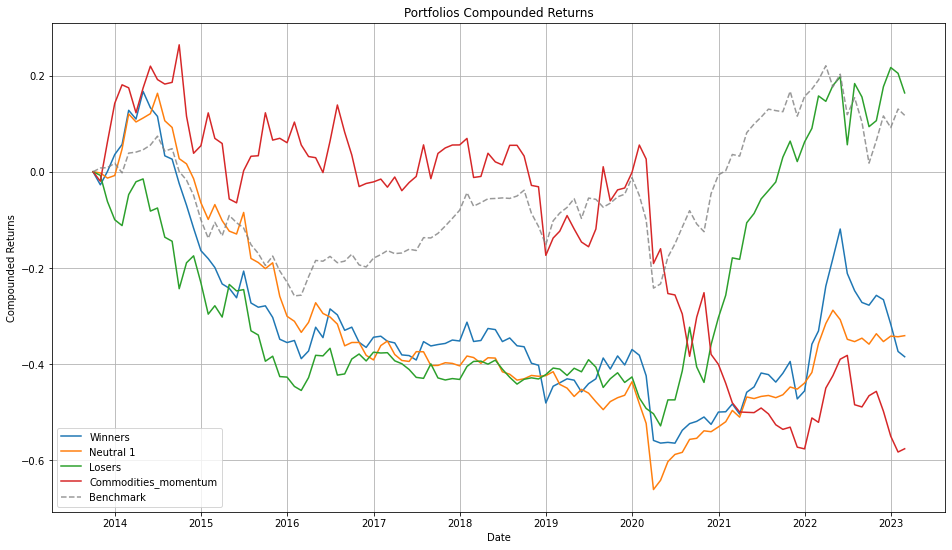

In [69]:
commodities_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=commodities_factor, 
    strategies=pqr.factors.split_quantiles(3, better='more'),
    allocator=pqr.equal_weights, 
    calculator=commodities_returns_calculator, 
    add_wml=True, 
)

commodities_momentum_portfolios[-1].name = 'Commodities_momentum'

summary.display(commodities_momentum_portfolios)

Все WML на одном графике

,Assets_momentum,Stocks_momentum,Bonds_momentum,Commodities_momentum
"Monthly Mean Return, %",18.78*** (2.80),-6.93 (-1.64),1.15 (0.69),-6.60 (-0.94)
"Monthly Volatility, %",20.69,13.03,5.15,21.67
"Alpha, %",20.19*** (3.25),-6.56 (-1.56),1.45 (0.92),-6.44 (-0.91)
"Sharpe Ratio, %",0.91,-0.53,0.22,-0.30
"Mean Turnover, %",357.89,473.68,500.00,478.95
"Win Rate, %",59.65,41.23,55.26,48.25
"Max Drawdown, %",-23.81,-59.03,-10.92,-66.96


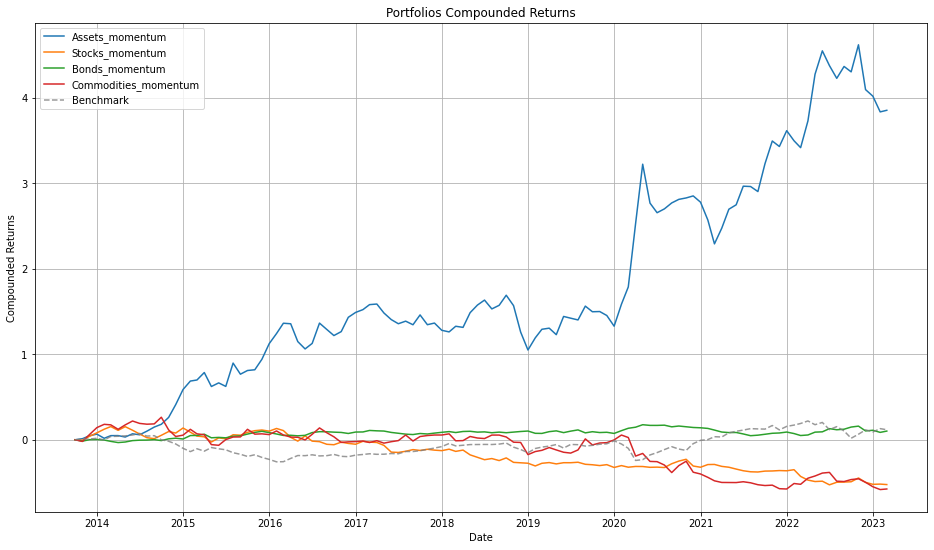

In [70]:
summary.display([assets_momentum_portfolios[-1], stocks_momentum_portfolios[-1],
                 bonds_momentum_portfolios[-1], commodities_momentum_portfolios[-1]])